# Perceptron Method

Let y=WX be the eqn of hyperplane
where W=[w0,w1,w2...wn] and X=[X0,x1,x2....Xn] 

## `--Algorithm--`

* Choose random values of wts initially 
* until converge:
    pick and random point and chk if it is classified properly
    if yes -> Do nothing and move to next iteration
    else -> Do transformation to classify it properly
* repeat above steps until we converges

## `--PsudoCode--`

```python
for _ in range(epochs):
    np.random.randint(X.shape[0])
    y_actual=y[idx]
    y_hat=np.dot(X[idx],W)

    if y[idx]<0 and y_hat>=0:
        # Transform/Move line towards +ve region
        Wts-=self.alpha*X[idx]
    elif y[idx]>=0 and y_hat<0:
        # Transform/Move line towards -ve region
        Wts+=self.alpha*X[idx]
```

In [273]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
from sklearn.model_selection import train_test_split
%matplotlib inline

In [274]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=100,n_features=2,n_classes=2,n_informative=1,n_redundant=0,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

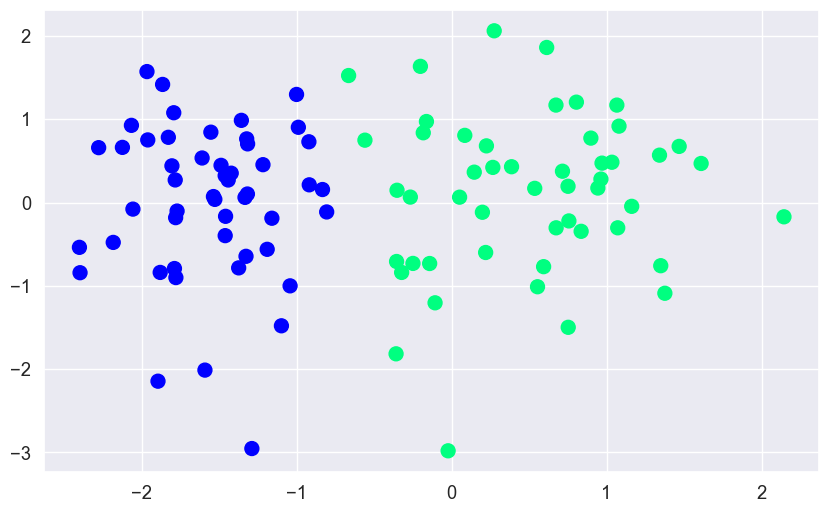

In [275]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)

In [276]:
y=np.where(y==0,-1,1)

In [277]:
# Spliting Data for Training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [278]:
class Perceptron:
    def __init__(self,alpha=0.1,num_iter=100):
        self.alpha = alpha
        self.num_iter = num_iter
        self.thetas=None

    def fit(self,X,y):
        m,n = X.shape
        # Adding col for the intercept
        X=np.concatenate([np.ones((m,1)),X],axis=1)
        self.thetas=np.random.random(n+1)
        for _ in range(self.num_iter):
            idx=np.random.randint(m)
            y_hat = np.dot(X[idx], self.thetas)

            if y[idx]<0 and y_hat>=0:
                # Transform/Move line towards +ve region
                self.thetas-=self.alpha*X[idx]
            elif y[idx]>=0 and y_hat<0:
                # Transform/Move line towards -ve region
                self.thetas +=self.alpha*X[idx]
    
    def predict(self,X):
        X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
        y_pred=np.dot(X,self.thetas)
        y_pred=np.where(y_pred>=0,1,-1)
        return y_pred

In [279]:
perceptron=Perceptron()
perceptron.fit(X_train,y_train)
c,a,b=perceptron.thetas
c,a,b

(0.8326556934808458, 1.0943706011732013, 0.18550785021568866)

In [280]:
y_pred=perceptron.predict(X_test)
y_pred,y_test

(array([ 1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,
        -1, -1, -1]),
 array([ 1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,
        -1, -1, -1]))

(-2.5, 2.5)

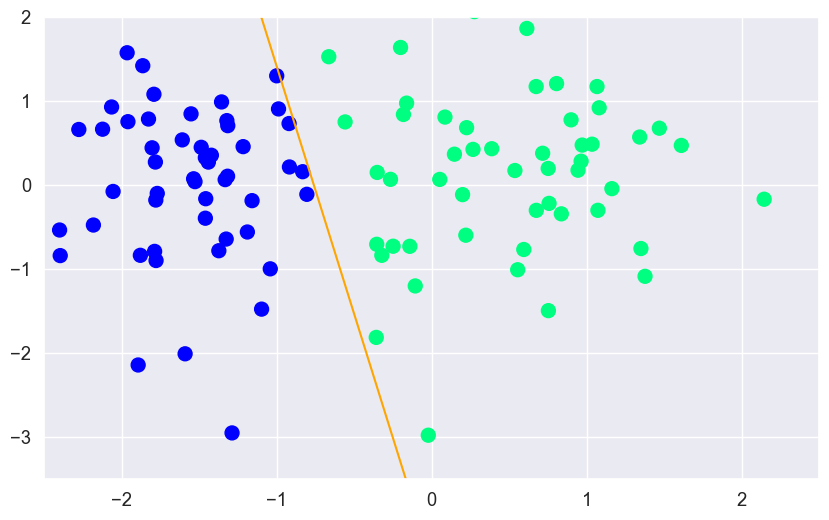

In [281]:
m,intercept=-a/b,-c/b
x=np.linspace(-3,3,100)

yPred=m*x+intercept

plt.figure(figsize=(10, 6))
plt.plot(x,yPred,color="orange")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3.5,2)
plt.xlim(-2.5,2.5)

<Axes: >

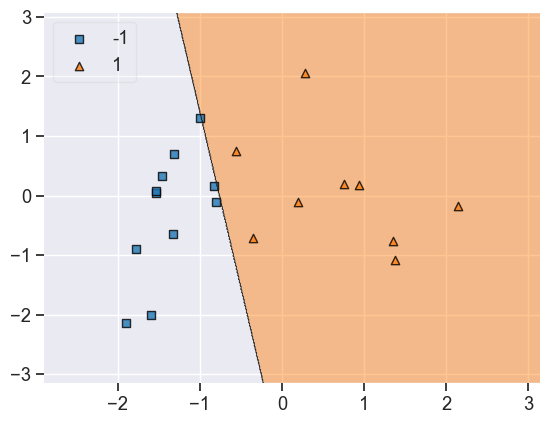

In [282]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_pred, clf=perceptron, legend=2)

In [283]:
from sklearn.metrics import classification_report
my_report=classification_report(y_test,y_pred)
print(f"My-Report:\n{my_report}")

My-Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



The BAD thing about this Model is it doesn't behave optimally always i.e once all points are classified it will not optimise/learn in order to maximize the marginal plane thus can perform a bit loose in testing phase.

And thats why we tend to use the Sigmoid method which is much more Reliable and efficient